# Perform logical quantum state tomography for two logical qubits
This demo notebook demonstrates logical quantum state tomography (QST) for two d=3 rotated surface code qubits that are placed on a square lattice. The two qubits can be initialized in either $\ket{0}$, $\ket{1}$, $\ket{+}$, or $\ket{-}$. After the initialization, we perform one QEC cycle before doing the measurement for logical QST. The goal of this experiment could be to verify that the syndrome extraction does not affect the logical state of the two logical qubits. I.e. the expectation values we get in the end should be the same as if we had no QEC cycles.

In [1]:
from qeclib import (
    RotSurfCode,
    SquareLattice,
    QECPlot,
    circ_log_QST_results,
    plot_log_QST_results,
)
import stim

Create the logical qubit objects and place them on the square lattice. Then initialize them in some state. Feel free to change the initial states and observe how the results of the logical QST change.

In [2]:
Q1 = RotSurfCode(
    id="Q1",
    dx=3,
    dz=3,
)
Q2 = RotSurfCode(
    id="Q2",
    dx=3,
    dz=3,
)
circ = SquareLattice(name="", rows=3, cols=7)
circ.add_logical_qubit(Q1)
circ.add_logical_qubit(Q2, start_pos=(4, 0))

circ.init("Q1", "1")
circ.init("Q2", "0")


We can also plot the stabilizers of the two logical qubits to check whether they were correctly placed on the lattice:

In [3]:
qecplot = QECPlot(circ)
qecplot.plot_logical_qubit("Q1")
qecplot.plot_logical_qubit("Q2")
qecplot.show()

Now we add syndrome extraction cycles for both logical qubits:

In [4]:
uuids = (
    circ.add_par_def_syndrome_extraction_circuit_all_log_qbs()
)  # Add a syndrome extraction cycle

# Plot the circuit using stim
To verify that we have the syndrome extraction circuit that we want, we can plot the circuit using stim:

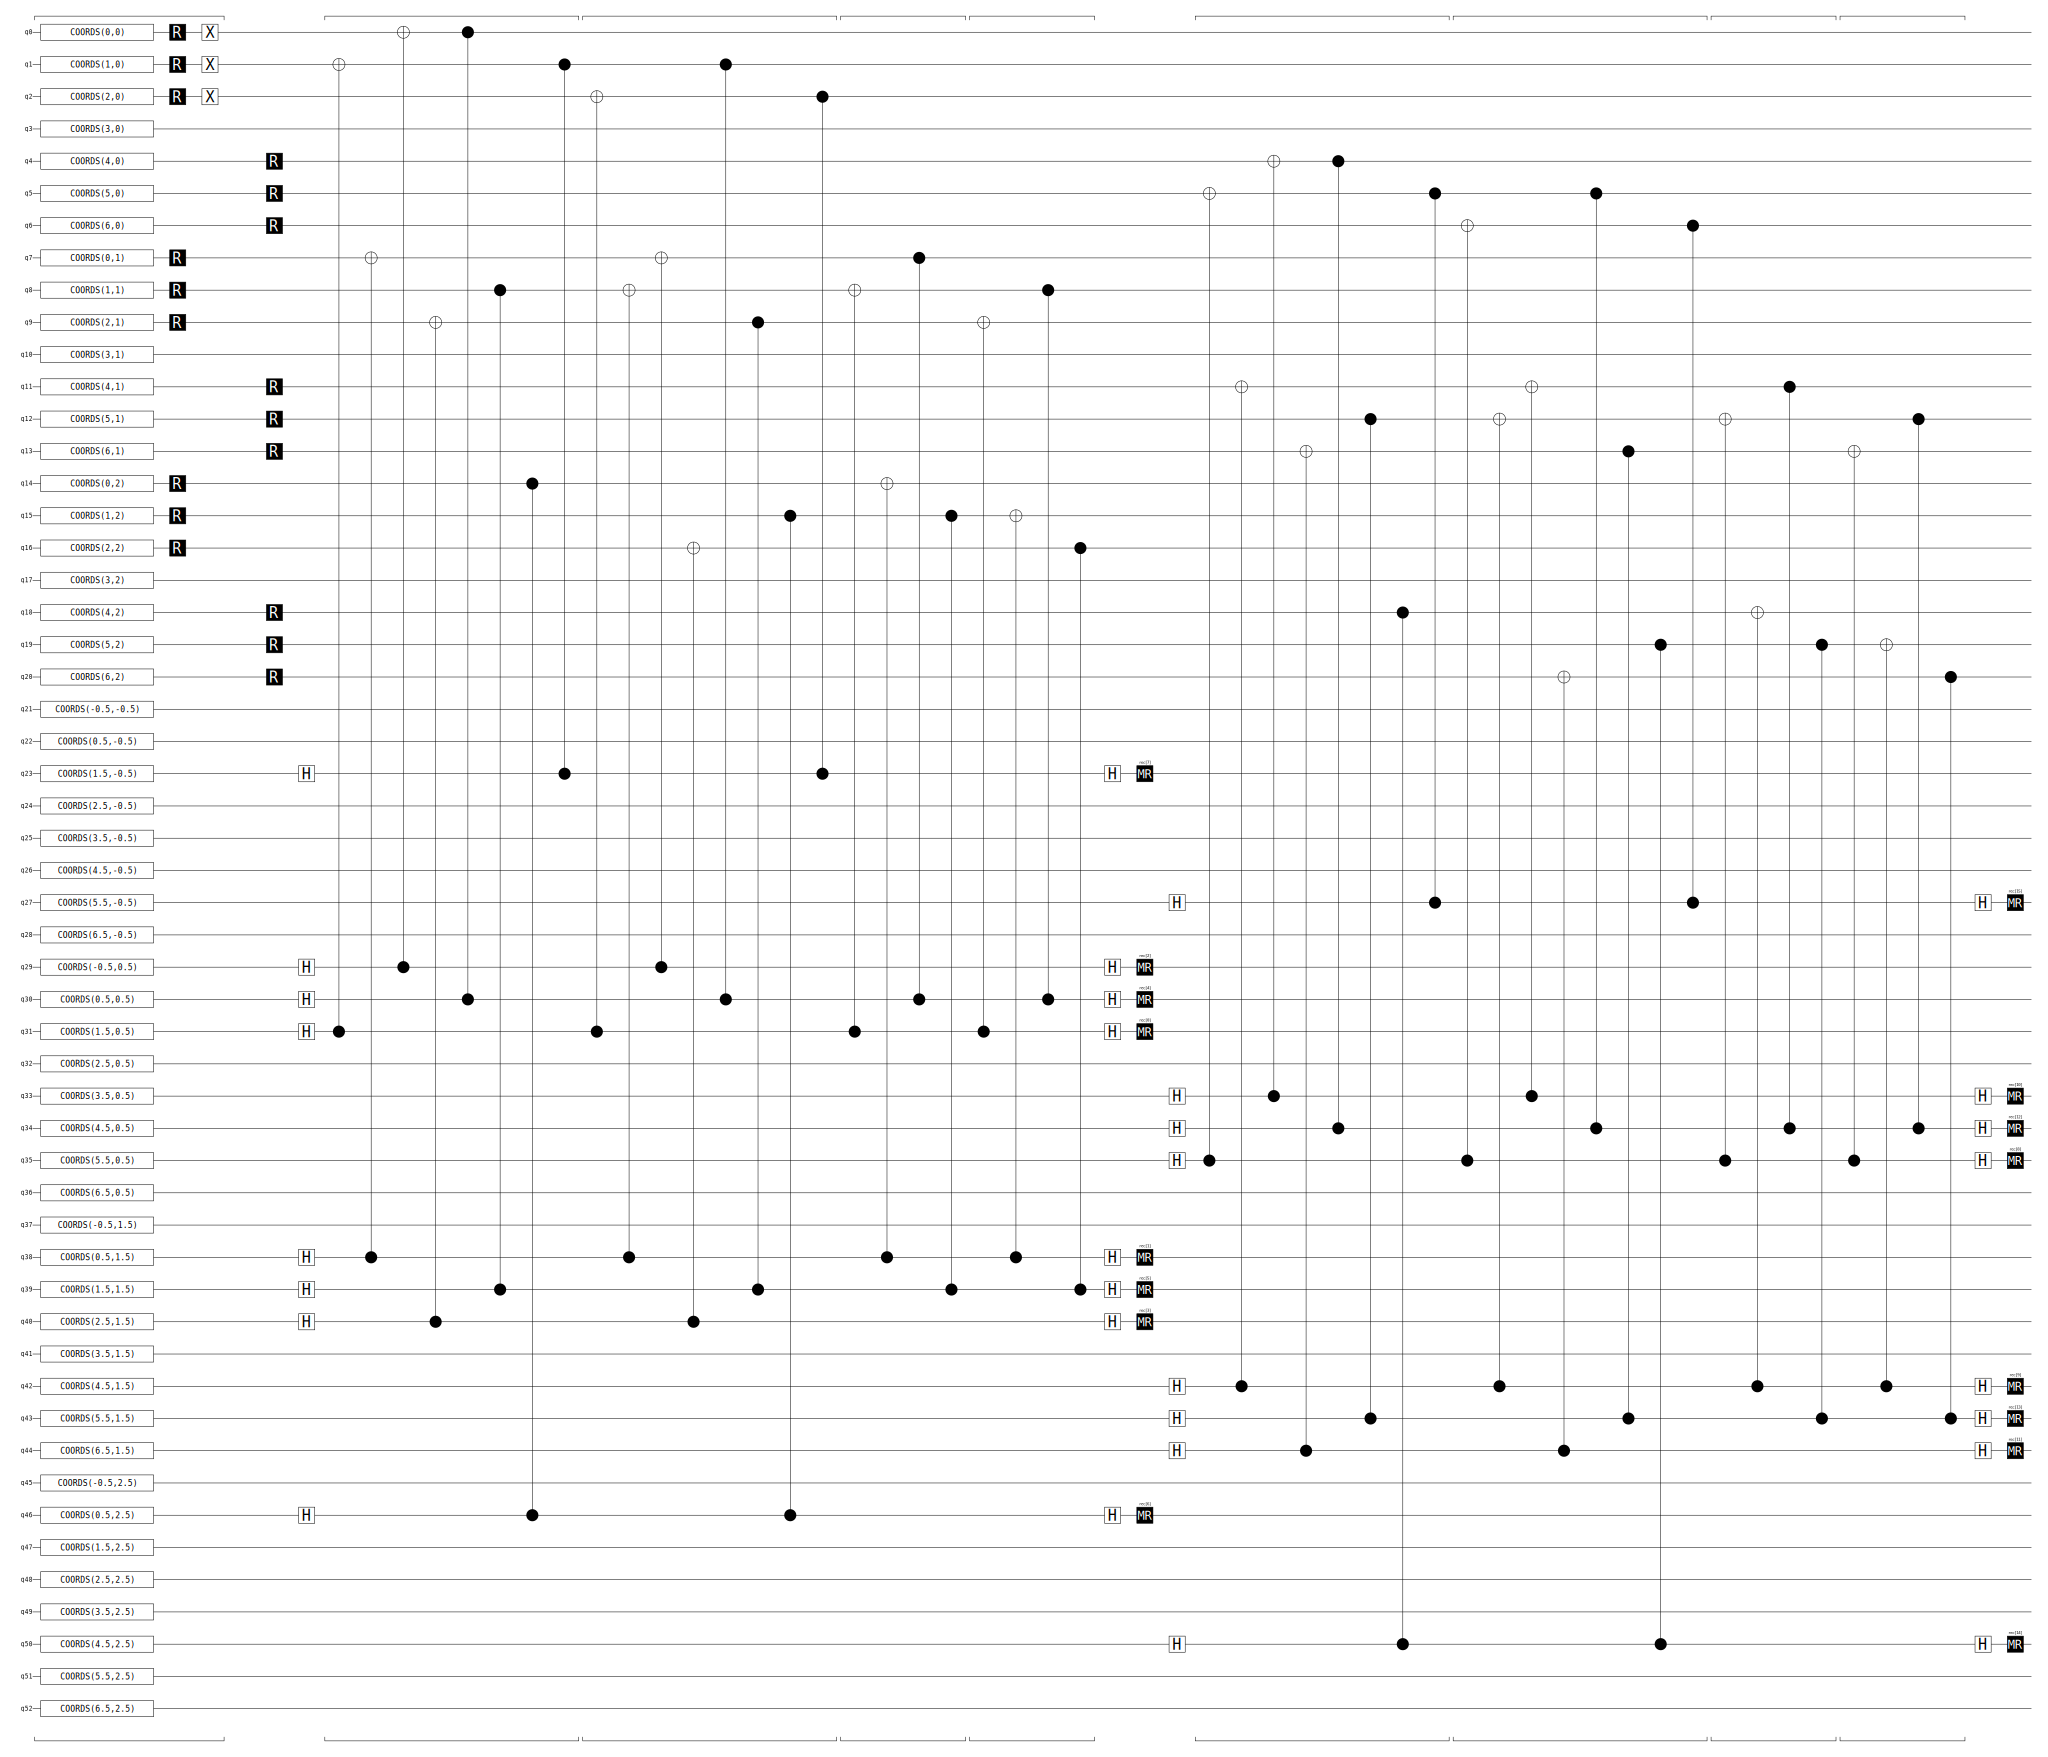

In [5]:
stim.Circuit(circ.convert_to_stim()).diagram(type="timeline-svg")

# Perform the logical quantum state tomography
For performing logical quantum state tomography, we use the `circ_log_QST_results` utility function. This function creates multiple copies of our circuit and to every copy, it adds measurements of the two logical qubits in different bases. These circuits are then simulated with stim and the results are averaged over the specified number of shots to obtain expectation values. 

One can specify the bases in which the qubits should be measured by the `bases` parameter. In this example we don't measure in the Y basis since the value can be obtained from the X and Z measurements. `I` denotes that a qubit is not measured. E.g. the two-qubit expectation value `<XI>` means that the first qubit is measured in the X basis and the second qubit is not measured.

In [6]:
bases = ["I", "X", "Z"]
res_dict = circ_log_QST_results(circ, num_shots=5000, bases=bases)
for basis, exp_val in res_dict.items():
    print(f"<{basis}> = {exp_val}")

<II> = 0.0
<IX> = 0.4982
<IZ> = 0.0
<XI> = 0.4828
<XX> = 0.5032
<XZ> = 0.4864
<ZI> = 1.0
<ZX> = 0.503
<ZZ> = 1.0


# Plot the results
There is also a convenience function to plot the obtained expectation values in a 3D bar chart:

C:\Users\jonat\AppData\Local\Temp\ipykernel_39796\366770762.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



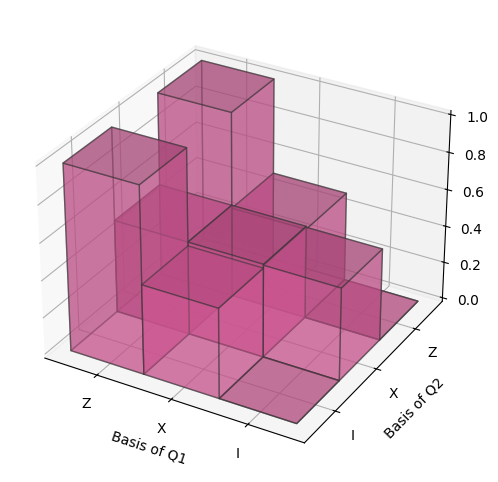

In [7]:
fig = plot_log_QST_results(res_dict)
fig.show()